
# data_TIMELInE
### ระบบหลอดไฟส่องสว่าง | LED 7 Watt |                                      


In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
i = 0
j = 0

time_a = pd.date_range('2016-10-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-10-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table data_timeline.light_system""" 
c.execute(query_empty)
print "data_timeline.light_system are Empty!!! \n"


query = "SELECT watt FROM data_timeline.light_res  WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
df = pd.read_sql(query, conn)

query1 = "SELECT watt_bed,watt_living,watt_kitc FROM data_timeline.light_sys1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
df1 = pd.read_sql(query1, conn)


while (j <= (5760*d)-1): 
    c.execute("INSERT INTO data_timeline.light_system (Timestamp, watt) VALUES (%s, %s)",(time_b[j],(df.watt[i]+df1.watt_bed[i]+df1.watt_living[i]+df1.watt_kitc[i])*7))
    conn.commit()
    i+=1
    j+=1
    if (i >= len(df)):
        i = 0    
        print ".",
print '\nDONE!'        




data_timeline.light_system are Empty!!! 

. 
DONE!


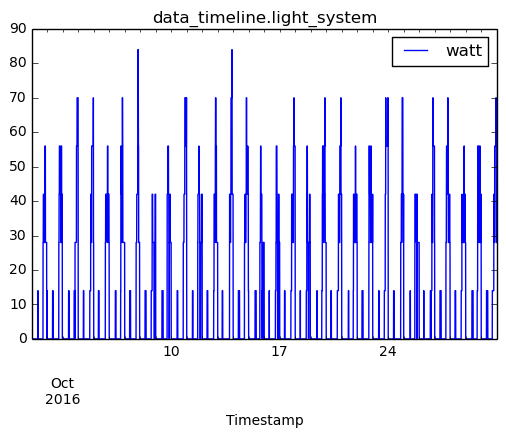

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
query = "SELECT * FROM data_timeline.light_system WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_timeline.light_system')
df.plot(ax=ax )
plt.show()
df.to_csv('file.csv')
